In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/home/rgukt/codsoft/IMDb Movies India2.csv")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [4]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
df.shape

(15509, 10)

In [6]:
df.dropna(subset=df.columns[0:11],how='all',inplace=True)

In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
def get_mode_with_default(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result[0]
    else:
        return 'unknown'  
df['Actor 1']=df['Actor 1'].fillna(df.groupby('Year')['Actor 1'].transform(get_mode_with_default))

In [10]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1      129
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df['Year']=df['Year'].str.extract(r'([0-9].{0,3})',expand=False)

In [12]:
df['Year']=pd.to_numeric(df['Year'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   15380 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [14]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1      129
Actor 2     2384
Actor 3     3144
dtype: int64

In [15]:
df.dropna(subset=['Name','Year'],how='any',inplace=True)

In [16]:
df['Duration']=df['Duration'].str.extract(r'([0-9]+)',expand=False)

In [17]:
df['Duration']=pd.to_numeric(df['Duration'])

In [18]:
def get_mean_with_default(x):
    mean_result = x.mean()
    return mean_result
    
df['Duration']=df['Duration'].fillna(df.groupby('Year')['Duration'].transform(get_mean_with_default))

In [19]:
df.dropna(subset=['Duration'],how='any',inplace=True)

In [20]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1830
Rating      7049
Votes       7048
Director     497
Actor 1        0
Actor 2     2192
Actor 3     2898
dtype: int64

In [21]:
df['Actor 2']=df['Actor 2'].fillna(df.groupby('Year')['Actor 2'].transform(get_mode_with_default))

In [22]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1830
Rating      7049
Votes       7048
Director     497
Actor 1        0
Actor 2        0
Actor 3     2898
dtype: int64

In [23]:
df['Actor 3']=df['Actor 3'].fillna(df.groupby('Year')['Actor 3'].transform(get_mode_with_default))

In [24]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1830
Rating      7049
Votes       7048
Director     497
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [25]:
df['Rating']=df['Rating'].fillna(df.groupby('Year')['Rating'].transform(get_mean_with_default))

In [26]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1830
Rating        38
Votes       7048
Director     497
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [27]:
df.dropna(subset='Director',how='any',inplace=True)

In [28]:
df['Director']=df['Director'].fillna(df.groupby(['Year','Actor 1','Actor 2','Actor 3'])['Director'].transform(get_mode_with_default))

In [29]:
df.dropna(subset='Rating',how='any',inplace=True)

In [30]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1814
Rating         0
Votes       6519
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [31]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [32]:
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')

In [33]:
df['Votes']=df['Votes'].fillna(df.groupby('Year')['Votes'].transform(get_mean_with_default))

In [34]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1814
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [35]:
df['Genre']=df['Genre'].fillna(df.groupby(['Actor 1','Actor 2','Actor 3'])['Genre'].transform(get_mode_with_default))

In [36]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [37]:
df.shape

(14433, 10)

# Data Analysis

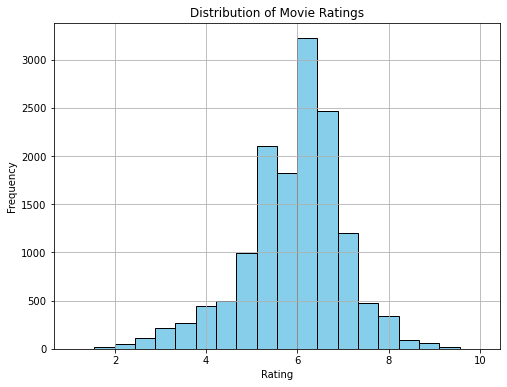

In [38]:
# 1. Rating Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

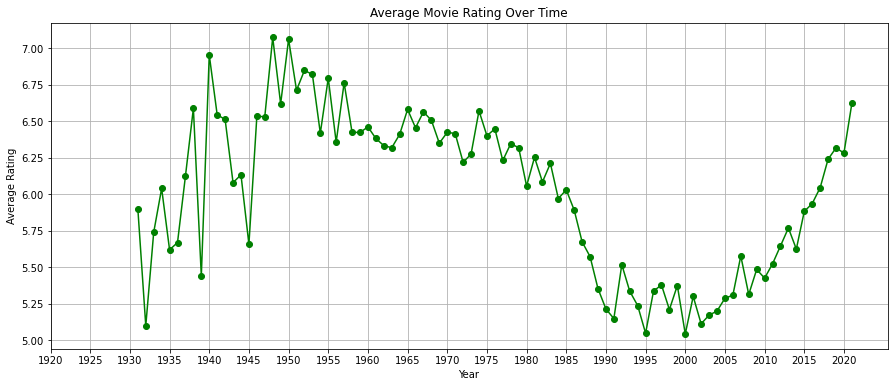

In [39]:
# 2. Trends Over Time
import numpy as np
plt.figure(figsize=(15, 6))
df.groupby('Year')['Rating'].mean().plot(marker='o', color='green')
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(np.arange(1920,2025,5))

plt.grid(True)
plt.show()

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
pd.unique(df['Director'])

array(['Gaurav Bakshi', 'Soumyajit Majumdar', 'Ovais Khan', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [42]:
df.describe()

,Year,Duration,Rating,Votes
count,14433.000000,14433.000000,14433.000000,14433.000000
mean,1986.901684,132.304479,5.925814,1646.994548
std,25.578966,22.149914,1.093058,8679.301169
min,1931.000000,2.000000,1.100000,5.000000
25%,1968.000000,121.725926,5.300741,25.052632
50%,1991.000000,136.000000,6.084874,110.471264
75%,2009.000000,145.000000,6.600000,1316.969925
max,2021.000000,321.000000,10.000000,591417.000000


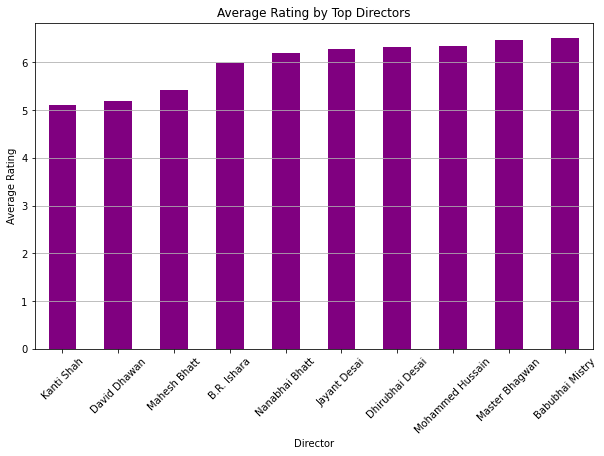

In [43]:
# 4. Director Influence
top_directors = df['Director'].value_counts().head(10).index.tolist()
df_top_directors = df[df['Director'].isin(top_directors)]
plt.figure(figsize=(10, 6))
df_top_directors.groupby('Director')['Rating'].mean().sort_values().plot(kind='bar', color='purple')
plt.title('Average Rating by Top Directors')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


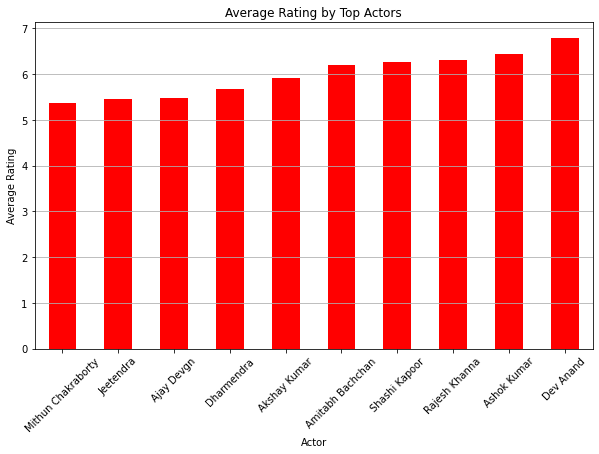

In [44]:
# 5. Actor Influence
top_actors = df['Actor 1'].value_counts().head(10).index.tolist()
df_top_actors = df[df['Actor 1'].isin(top_actors)]
plt.figure(figsize=(10, 6))
df_top_actors.groupby('Actor 1')['Rating'].mean().sort_values().plot(kind='bar', color='red')
plt.title('Average Rating by Top Actors')
plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [45]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.000000,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.000000,"Drama, Musical",6.625641,4007.688312,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.000000,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.000000,Drama,5.426250,3151.225000,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.000000,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989.0,125.000000,"Action, Crime, Drama",5.800000,44.000000,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988.0,146.215190,Action,4.600000,11.000000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.000000,"Action, Drama",4.500000,655.000000,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,127.709091,Action,5.282703,1525.184783,Kiran Thej,Sangeeta Tiwari,Prakash Raj,Vinod Tripathi


# build model and evaluation

In [46]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
li=['Name','Genre','Director','Actor 1','Actor 2','Actor 3']
for i in li:
    df[i]=enc.fit_transform(df[i])


In [47]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
input_data=df[['Genre','Votes','Director','Actor 1', 'Actor 2', 'Actor 3']]
output=df['Rating']
x=input_data.values
y=output.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)

(10824, 6)
(3609, 6)


In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(y_pred)

[6.01492749 6.05853875 5.95495626 ... 5.95548029 6.05963188 5.99642135]


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.8164281491492187
Mean Squared Error: 1.1203464431552757
Root Mean Squared Error: 1.0584641907760866
R-squared: 0.030085698677277062


In [51]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=10)
ridgereg.fit(x_train,y_train)
y_pred=ridgereg.predict(x_test)
print(y_pred)

[6.01492748 6.05853874 5.95495626 ... 5.95548029 6.05963187 5.99642135]


In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.816428149388974
Mean Squared Error: 1.120346443283235
Root Mean Squared Error: 1.0584641908365322
R-squared: 0.03008569856649923


In [53]:
df['Rating'].median()

6.084873949579833

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.941724182742914


In [62]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Train the model
model.fit(x_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(x_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)


0.9136209543077098


In [64]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Step 5: Train the model
model.fit(x_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(x_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)

1.8436405044523794
